<a href="https://colab.research.google.com/github/bbutka/CEC595/blob/main/HW_Roulette.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the Open Ai roulette gym

Since this roulette environment has many more actions (38) than blackjack (2),  the code is designed to handle arbitary action sets. argmax is a useful routine for indicating which element of a vector contains the largest value.

In [ ]:
import gym
import graphviz 		
from sklearn import tree

def argmax(v):
  i = 0
  mx = v[i]
  mxi = 0
  while i < len(v):
    if v[i] > mx: mx, mxi = v[i], i
    i += 1
  return(mxi)

Set up the environment and some key parameters.

In [ ]:
env = gym.make("Roulette-v0")
gamma = 0.9
epsilon = 0.1
epochs = 4
N = 10000
gamma = 0.9

Here's the modified learner. It learns for N episodes, repeats epochs times, then displays the decision tree representing the learned value function.

In [ ]:
import random
random.random

<function Random.random>

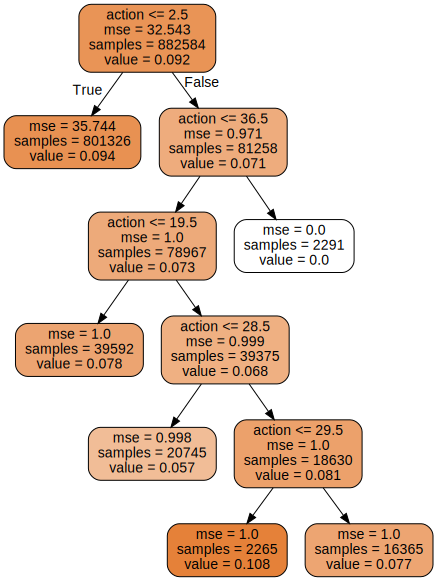

In [ ]:
env = gym.make("Roulette-v0")

for epoch in range(epochs):
  dat = []
  lab = []
  for _ in range(N):
    done = False
    observation, ret = env.reset(), 0
    while not done:
      # pick an action
      if epoch == 0:
        action = env.action_space.sample()
      else:
        # predict values, choose greedily
        pred = clf.predict([(observation, a) for a in range(env.action_space.n)])
        action = argmax(pred)
      # epsilon greedy
      if random.random() < epsilon:
        action = env.action_space.sample()
      dat += [(observation, action)]
      observation, reward, done, info = env.step(action)
      ret += reward
      if done:
        target = reward
      elif epoch == 0:
#        target = -1+2*random.random()
        target = 0
      else:
        pred = clf.predict([(observation, a) for a in range(env.action_space.n)])
        target = reward + gamma * max(pred)
      lab += [target]
  clf = tree.DecisionTreeRegressor(max_leaf_nodes = 6)	
  clf = clf.fit(dat, lab)

  dot_data = tree.export_graphviz(clf, # class_names = [-1, 0, 1],
                                feature_names = ["state", "action"], filled=True, rounded=True) 
  graph = graphviz.Source(dot_data)	
  env.close()
graph